## Machine learning (Logistic Regresion)

In [50]:
import os
import pandas as pd

# Path donde se encuentran mis archivos train
BASE_PATH = "../data/processed"
TRAIN_PATHS = [
    "X_train_con_outliers_raw.xlsx",
    "X_train_sin_outliers_raw.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]

# Guardo cada uno de estos archivos dentro de una lista
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

# Path donde se encuentran mis archivos test
TEST_PATHS = [
    "X_test_con_outliers_raw.xlsx",
    "X_test_sin_outliers_raw.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]

# Guardo cada uno de estos archivos dentro de una lista
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

## 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = []
for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    model = LogisticRegression(random_state = 42)
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train": accuracy_score(y_train, y_pred_train),
            "test": accuracy_score(y_test, y_pred_test)
        }
    )

results

0
1


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Carlos\AppData\Lo

2
3
4
5


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[{'train': 0.8981183611532625, 'test': 0.8992473901432386},
 {'train': 0.8930500758725342, 'test': 0.8941490653071134},
 {'train': 0.8999393019726859, 'test': 0.9014323865015781},
 {'train': 0.8997572078907435, 'test': 0.9007040543821316},
 {'train': 0.9001820940819424, 'test': 0.9019179412478757},
 {'train': 0.8997268588770865, 'test': 0.9011896091284293}]

En este caso el que tiene una mayor precision es que tiene indice 2

Primero realizare un RandomizeSearchCV de manera general para encontrar los mejores valores y optimizar sobre ellos posteriormente

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

best_dataset = 4

hyperparams_general = {
    'C': np.logspace(-3, 3, 1000),          # Desde regularización muy fuerte hasta muy débil
    'tol': np.linspace(0.0001, 0.01, 100),    # Rango amplio para el criterio de convergencia
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2', 'elasticnet', None],                # Simplificamos a l1 y l2 para el ejemplo
    'max_iter': [100, 400, 500, 600, 1000, 3000, 7000, 15000],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],                     # 'saga' es flexible y soporta ambas penalizaciones
    'class_weight': [None, 'balanced'],
    'dual': [False, True],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'l1_ratio': [None, 0.15, 0.5, 0.85],
}


model = LogisticRegression(random_state = 42)    # Al haber una gran cantidad de datos negativos y en comparacion con los positivos usare class_weight='balanced'


grid_general  = RandomizedSearchCV(model, hyperparams_general, n_iter = 500, cv = 10, scoring='accuracy', n_jobs = -1)

El F1 Score es una métrica de evaluación que combina la precisión y el recall en un solo valor. Se define como la media armónica de la precisión (la proporción de verdaderos positivos sobre todas las predicciones positivas) y el recall (la proporción de verdaderos positivos sobre todos los casos positivos reales).

In [53]:
grid_general.fit(TRAIN_DATASETS[best_dataset], y_train)

print("Mejor score en RandomizedSearchCV:", grid_general.best_score_)
print("Mejores parámetros encontrados:", grid_general.best_params_)

Mejor score en RandomizedSearchCV: 0.8998179059180578
Mejores parámetros encontrados: {'tol': np.float64(0.0058000000000000005), 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'auto', 'max_iter': 500, 'l1_ratio': None, 'fit_intercept': False, 'dual': False, 'class_weight': None, 'C': np.float64(4.361537789208006)}


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3550 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\lo

### Optimizo la busqueda anterior usando un rango alrededor de la muestra obtenida

In [54]:
# Extraemos los mejores parámetros de la búsqueda amplia
best_params = grid_general.best_params_
best_C = best_params["C"]
best_tol = best_params["tol"]

# Creamos un grid refinado en torno a los mejores valores encontrados
# Por ejemplo, generamos 10 valores para C en un rango pequeño alrededor del óptimo
C_range = np.logspace(np.log10(best_C) - 0.5, np.log10(best_C) + 0.5, 30)
# Y para tol, usamos un rango lineal ajustado alrededor del valor óptimo
tol_range = np.linspace(max(best_tol - 0.0005, 0.0001), best_tol + 0.0005, 30)

# Creamos el grid refinado, fijando los demás parámetros al mejor encontrado
hyperparams_optimizacion = {
    'C': C_range,
    'tol': tol_range,
    'fit_intercept': [best_params['fit_intercept']],
    'penalty': [best_params['penalty']],
    'max_iter': [best_params['max_iter']],
    'solver': [best_params['solver']],
    'class_weight': [None, 'balanced'],
    'dual': [best_params['dual']],
    'multi_class': [best_params['multi_class']],
    'l1_ratio': [best_params['l1_ratio']]
}



# Configuramos GridSearchCV para refinar la búsqueda
grid_optimized = GridSearchCV(model, hyperparams_optimizacion, cv=7, scoring='accuracy', n_jobs=14)

# Ajustamos el modelo con el grid refinado
grid_optimized.fit(TRAIN_DATASETS[best_dataset], y_train)

print("Mejor score en GridSearchCV refinado:", grid_optimized.best_score_)
print("Mejores parámetros refinados:", grid_optimized.best_params_)

Mejor score en GridSearchCV refinado: 0.9001820622190164
Mejores parámetros refinados: {'C': np.float64(4.538172700267454), 'class_weight': None, 'dual': False, 'fit_intercept': False, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': np.float64(0.005782758620689656)}


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [55]:
from sklearn.metrics import accuracy_score

final_model = grid_optimized.best_estimator_
y_pred_train = grid_optimized.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = grid_optimized.predict(TEST_DATASETS[best_dataset])

In [56]:
# 0.890227617602428
train_accuracy = accuracy_score(y_train, y_pred_train)
train_accuracy

# 0.9002427921092564 

0.9002124430955994

In [57]:
# 0.8909929594561787
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy

# 0.9021607186210245

0.9020393299344501

Dudas:

- que hemos hecho con feature selection, no lo hemos usado?
- Por que apenas obtengo mejoras y como puedo conseguir llegar al 0.9
- Hay alguna manera de poder graficar la progresion de los hyperparametros cuando se calcula con un conjunto de estos? Lo que yo he hecho los calcula individualmente y no me da buen resultado
- En cual de los valores me tengo que fijar?

- He visto que en casos como estos en los que las clases estan desbalanceadas(muchos mas no que si), la metrica accuracy no es correcta y puede estar fallando y dando falsos positivos.
Que otras metricas tendria que utilizar?

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Asumiendo que ya tienes y_test y y_pred
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)


print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


###### ORIGINAL

# Accuracy: 0.8902646273367322
# Precision: 0.2759493670886076
# Recall: 0.0980603448275862
# F1 Score: 0.16758747697974216
# Confusion Matrix:
# [[7243   67]
#  [ 837   91]]



Accuracy: 0.9020393299344501
Precision: 0.7037037037037037
Recall: 0.2252155172413793
F1 Score: 0.34122448979591835
Confusion Matrix:
 [[7222   88]
 [ 719  209]]


In [59]:
y_prob = final_model.predict_proba(TEST_DATASETS[best_dataset])[:, 1]

# Suponiendo que decidimos probar un umbral de 0.4 en lugar del 0.5
umbral = 0.5
y_pred_ajustado = (y_prob > umbral).astype(int)

# Calculamos las métricas con el nuevo umbral
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado))
print("Precision:", precision_score(y_test, y_pred_ajustado))
print("Recall:", recall_score(y_test, y_pred_ajustado))
print("F1 Score:", f1_score(y_test, y_pred_ajustado))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ajustado))

Accuracy: 0.9020393299344501
Precision: 0.7037037037037037
Recall: 0.2252155172413793
F1 Score: 0.34122448979591835
Confusion Matrix:
 [[7222   88]
 [ 719  209]]


Conclusiones:

El modelo tiene un entrenamiento correcto, dependiendo del objetivo del negocio podemos cambiar el umbral de esta manera:

 - Con un umbral de 0.4, se detecta a más clientes (recall del 71%), pero la precisión cae a alrededor del 24%, lo que implica que se contactará a muchos clientes que no son realmente interesados. El F1 Score es ligeramente inferior al de la configuración por defecto(0.5).

 - Con un el umbral de 0.6, el modelo se vuelve más conservador. Esto eleva la precisión (más de 32% de las predicciones positivas son correctas) y mejora el F1 Score, pero reduce el recall a alrededor del 58%, lo que significa que se pierden algunos clientes potenciales.

 - Con el umbral por defecto se capturan aproximadamente el 69% de los verdaderos positivos, pero solo el 25% de los clientes contactados realmente son potenciales interesados.


En principio la manera de captar mas clientes seria con un umbral del 0.4 ya que se contacta a muchos mas clientes, pero conlleva un mayor gasto economico ya que es menos preciso.

C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


k = 5: Recall = 0.9002


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


k = 6: Recall = 0.9002


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


k = 7: Recall = 0.9002


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


k = 8: Recall = 0.9001


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


k = 9: Recall = 0.9008


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


k = 10: Recall = 0.9008
k = 11: Recall = 0.9005


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


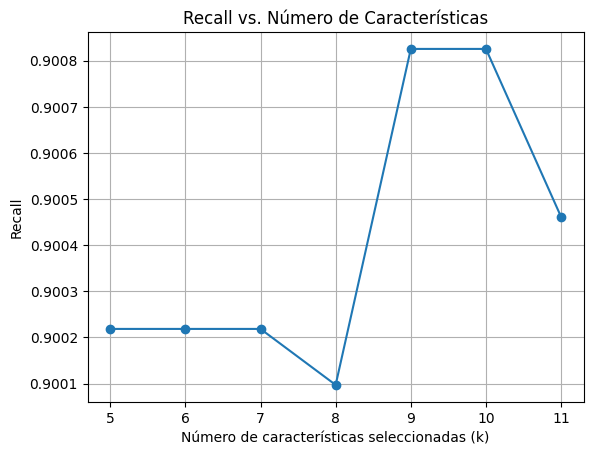

Características seleccionadas: ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'pdays', 'previous', 'nr.employed', 'contact_telephone', 'month_mar', 'month_oct', 'poutcome_nonexistent', 'poutcome_success']


In [61]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import recall_score

# Seleccionamos el mejor dataset (índice 4) como en tus pruebas previas
best_index = 4
X_train_best = TRAIN_DATASETS[best_index]
X_test_best = TEST_DATASETS[best_index]

# Rango de k a evaluar; puedes ajustar estos valores según tu conveniencia
k_values = range(5, 12)  # Maximo para este dataset son 37
accuracy_scores = []

for k in k_values:
    # Selección de características con k
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_k = selector.fit_transform(X_train_best, y_train.values.ravel())
    X_test_k = selector.transform(X_test_best)
    
    # Entrenamiento del modelo de regresión logística
    grid_optimized.fit(X_train_k, y_train.values.ravel())
    y_pred_k = grid_optimized.predict(X_test_k)
    
    # Calculamos el accuracy para este k
    accuracies = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(accuracies)
    print(f"k = {k}: Recall = {accuracies:.4f}")

# Graficamos Accuracy vs. Número de Características (k)
plt.figure()
plt.plot(list(k_values), accuracy_scores, marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Recall")
plt.title("Recall vs. Número de Características")
plt.grid(True)
plt.show()


# Mostramos cuáles características han sido seleccionadas
mask = selector.get_support()
selected_features = X_train_best.columns[mask]
print("Características seleccionadas:", selected_features.tolist())